# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
#pip install citipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 675.6/675.6 kB 2.2 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675967 sha256=f97c7efc1e14a44286b555b3d91d4c4a7bf7e3211e896e024ce5ddf99de6e2dc
  Stored in directory: /Users/kim/Library/Caches/pip/wheels/41/82/37/8bb56372b0d828d226b83e0117780ecbe9f409100ac52364bd
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url).json()
        
        city_weather = weather_response["main"]["temp"]
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_response["coord"]["lat"]
        city_lng = weather_response["coord"]["lon"]
        city_max_temp = weather_response["main"]["temp_max"]
        city_humidity = weather_response["main"]["humidity"]
        city_clouds = weather_response["clouds"]["all"]
        city_wind = weather_response["wind"]["speed"]
        city_country = weather_response["sys"]["country"]
        city_date = weather_response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | buchanan
Processing Record 2 of Set 1 | brejo santo
Processing Record 3 of Set 1 | flying fish cove
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | tarrafal
Processing Record 6 of Set 1 | mount gambier
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | sola
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | portland
Processing Record 12 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | aasiaat
Processing Record 15 of Set 1 | vytegra
Processing Record 16 of Set 1 | isla mujeres
Processing Record 17 of Set 1 | fortuna
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | tonghae
Processing Record 20 of Set 1 | tolanaro
Processing Record 21 of Set 1 | codrington
Processing Record 22 of Set 1 | murzuq
Proc

Processing Record 34 of Set 8 | redkino
Processing Record 35 of Set 8 | ponot
Processing Record 36 of Set 8 | kaspiyskiy
Processing Record 37 of Set 8 | north elba
Processing Record 38 of Set 8 | mount isa
Processing Record 39 of Set 8 | thaton
Processing Record 40 of Set 8 | weno
Processing Record 41 of Set 8 | nova sintra
Processing Record 42 of Set 8 | dali
Processing Record 43 of Set 8 | myrnohrad
City not found. Skipping...
Processing Record 44 of Set 8 | mili
Processing Record 45 of Set 8 | gilleleje
Processing Record 46 of Set 8 | colonia
Processing Record 47 of Set 8 | phang nga
Processing Record 48 of Set 8 | 'ohonua
City not found. Skipping...
Processing Record 49 of Set 8 | coyhaique
Processing Record 0 of Set 9 | bathsheba
Processing Record 1 of Set 9 | kristiansund
Processing Record 2 of Set 9 | sysert'
Processing Record 3 of Set 9 | ishqoshim
Processing Record 4 of Set 9 | nikolayevsk
Processing Record 5 of Set 9 | espargos
City not found. Skipping...
Processing Record 6 

Processing Record 20 of Set 12 | cruzeiro do sul
Processing Record 21 of Set 12 | jeddah
Processing Record 22 of Set 12 | yallahs
Processing Record 23 of Set 12 | buchanan
Processing Record 24 of Set 12 | sanctuary point
Processing Record 25 of Set 12 | toliara
Processing Record 26 of Set 12 | aliwal north
Processing Record 27 of Set 12 | aginskoye
Processing Record 28 of Set 12 | regina
Processing Record 29 of Set 12 | gueltat zemmour
City not found. Skipping...
Processing Record 30 of Set 12 | linxia chengguanzhen
Processing Record 31 of Set 12 | skovorodino
Processing Record 32 of Set 12 | dzhalagash
Processing Record 33 of Set 12 | kurganinsk
Processing Record 34 of Set 12 | flin flon
Processing Record 35 of Set 12 | buguruslan
Processing Record 36 of Set 12 | bonthe
Processing Record 37 of Set 12 | ronda
Processing Record 38 of Set 12 | longboat key
Processing Record 39 of Set 12 | sukumo
Processing Record 40 of Set 12 | sylva
Processing Record 41 of Set 12 | kokstad
Processing Re

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,buchanan,5.8808,-10.0467,26.78,85,98,0.86,LR,1712906411
1,brejo santo,-7.4933,-38.9872,24.13,93,4,0.41,BR,1712906411
2,flying fish cove,-10.4217,105.6791,28.82,78,40,5.66,CX,1712906412
3,albany,42.6001,-73.9662,16.44,81,100,3.58,US,1712906282
4,tarrafal,15.2833,-23.7667,20.44,83,17,5.24,CV,1712906413


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,buchanan,5.8808,-10.0467,26.78,85,98,0.86,LR,1712906411
1,brejo santo,-7.4933,-38.9872,24.13,93,4,0.41,BR,1712906411
2,flying fish cove,-10.4217,105.6791,28.82,78,40,5.66,CX,1712906412
3,albany,42.6001,-73.9662,16.44,81,100,3.58,US,1712906282
4,tarrafal,15.2833,-23.7667,20.44,83,17,5.24,CV,1712906413


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

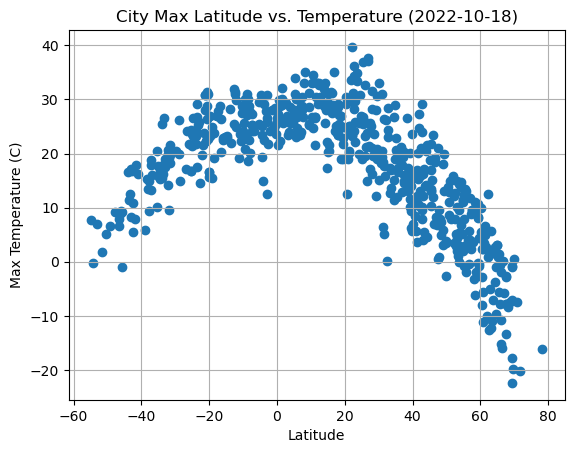

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'] )

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

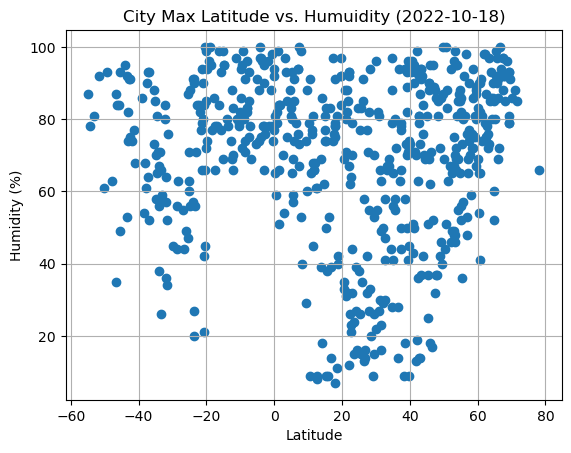

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humuidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

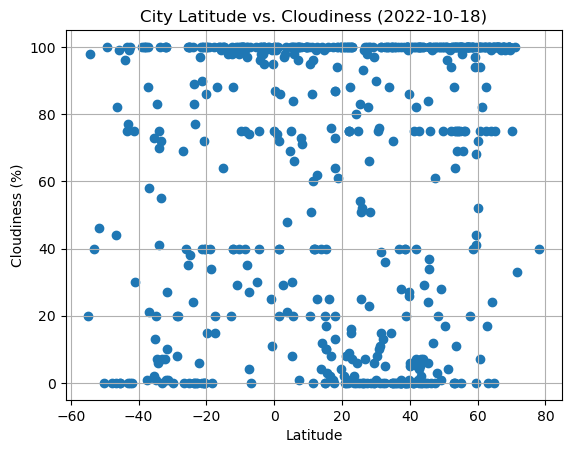

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

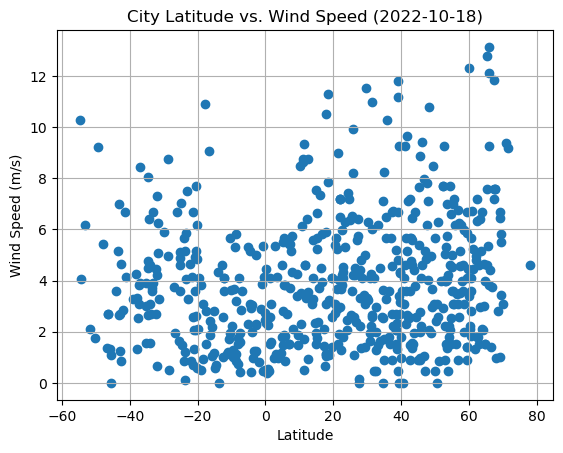

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress
from scipy import stats

def lin_regress_plots(x_values, y_values):
    
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
        
      
    # Plot the data points
    plt.scatter(x_values, y_values)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, color='red')
    
    # Display the equation of the regression line
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    
    plt.text(0.5, 0.9, equation, color='red', ha='center', va='center', transform=plt.gca().transAxes)
    
    # Display the R-squared value
    r_squared = rvalue ** 2
    print(f"The r-value is: {r_squared}")
    #plt.xlabel('Latitude')
    #plt.ylabel('Max Temp')
    #plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,buchanan,5.8808,-10.0467,26.78,85,98,0.86,LR,1712906411
3,albany,42.6001,-73.9662,16.44,81,100,3.58,US,1712906282
4,tarrafal,15.2833,-23.7667,20.44,83,17,5.24,CV,1712906413
6,iqaluit,63.7506,-68.5145,-7.15,85,100,5.14,CA,1712906413
9,talnakh,69.4865,88.3972,-19.90,91,99,5.53,RU,1712906415


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,brejo santo,-7.4933,-38.9872,24.13,93,4,0.41,BR,1712906411
2,flying fish cove,-10.4217,105.6791,28.82,78,40,5.66,CX,1712906412
5,mount gambier,-37.8333,140.7667,14.93,61,100,3.32,AU,1712906413
7,sola,-13.8833,167.5500,28.27,80,99,4.33,VU,1712906414
8,port elizabeth,-33.9180,25.5701,16.72,67,75,4.63,ZA,1712906415


The r-value is: 0.7320965936300812


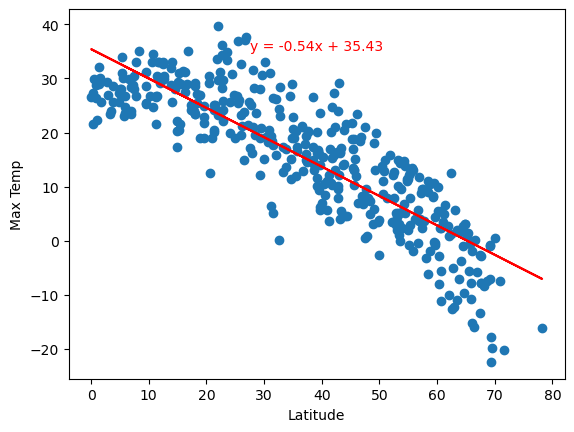

In [17]:
# Linear regression on Northern Hemisphere
x_values  = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

lin_regress_plots(x_values, y_values)

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The r-value is: 0.5711672628937431


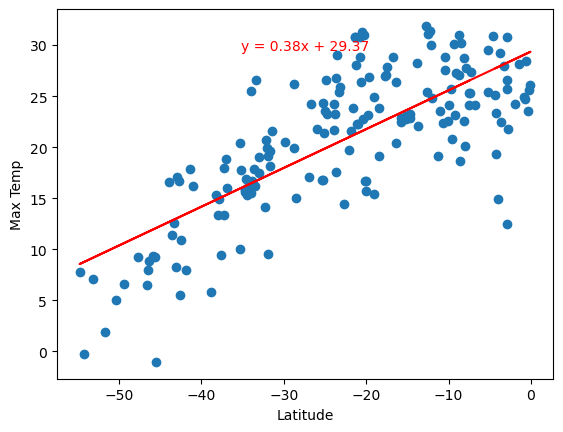

In [18]:
# Linear regression on Southern Hemisphere
x_values  = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

lin_regress_plots(x_values, y_values)

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** The linear relationship between the Northern Hemisphere's Latitude and Maximum Temperature is a strong negative correlation. From the scatter plot we can see as the Max Temperature increases the Latitiude decreases. The Southern Hemisphere has a moderate positive correlation. As the Max Temp increases the Latitude decreases. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.04726630671287428


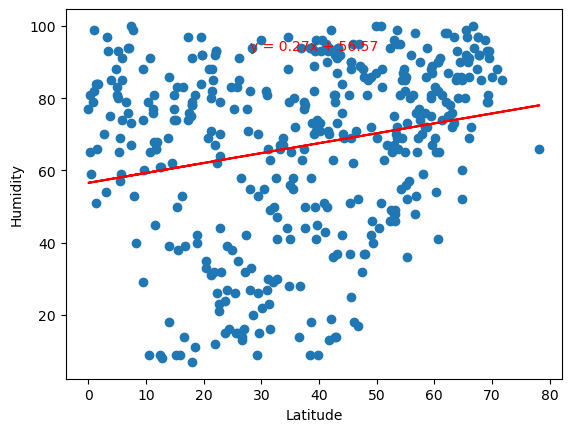

In [19]:
# Northern Hemisphere
x_values  = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

lin_regress_plots(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is: 0.07677782624005353


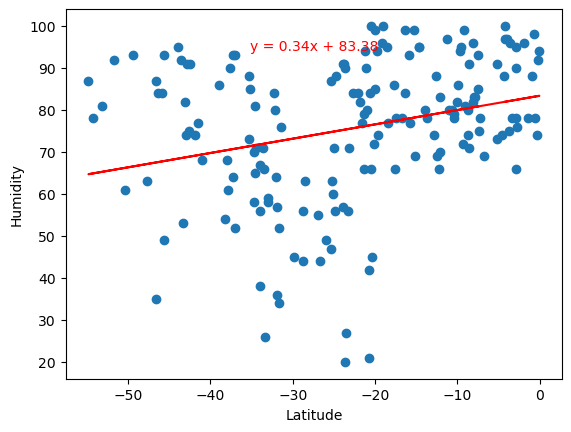

In [20]:
# Southern Hemisphere
x_values  = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

lin_regress_plots(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

Discussion about the linear relationship: Both the Northern Hemisphere and Southern Hemisphere have no correlation between Cloudiness and Latitude. We can see the regression line for both scatter plot is negative.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.032569221069064694


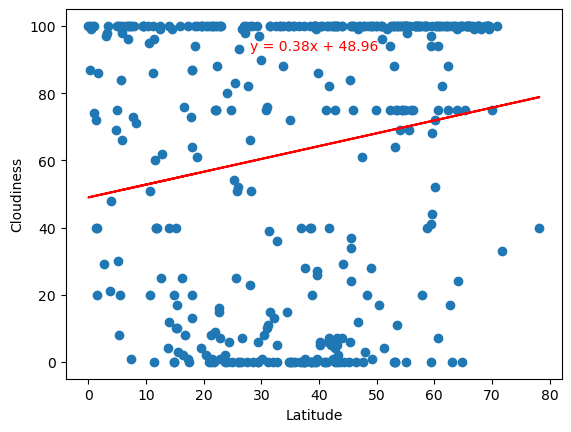

In [21]:
# Northern Hemisphere
x_values  = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

lin_regress_plots(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is: 0.09245721061441875


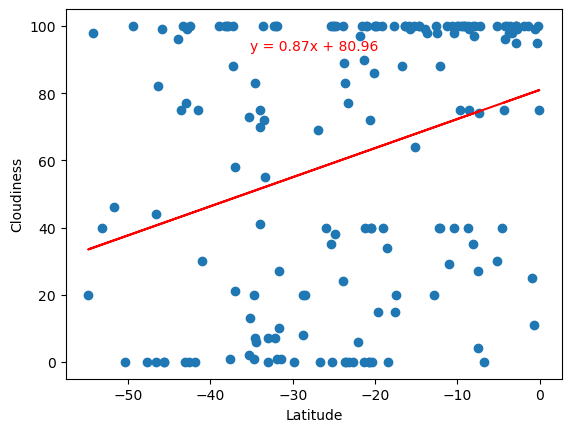

In [22]:
# Southern Hemisphere
x_values  = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

lin_regress_plots(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** Both the Northern Hemisphere and Southern Hemisphere have no correlation between Cloudiness and Latitude. We can see the regression line for both scatter plot is positive.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.023558152126087327


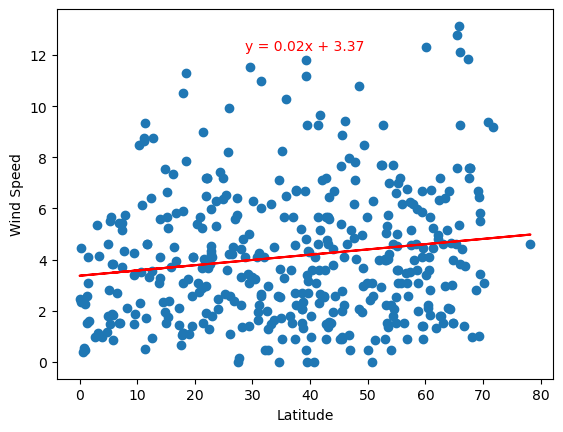

In [23]:
# Northern Hemisphere
x_values  = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

lin_regress_plots(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is: 0.0666700478823274


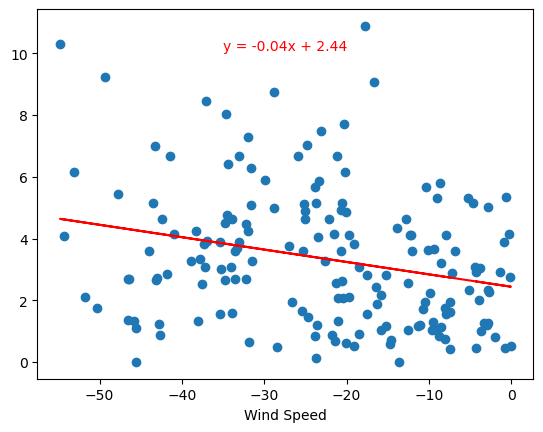

In [24]:
# Southern Hemisphere
x_values  = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

lin_regress_plots(x_values, y_values)
plt.xlabel('Latitude')
plt.xlabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** The Northern Hemisphere scatter plot shows no correlation between wind speeds and Latitude. It does show a positive reression line. The Southern Hemisphere has a negative regression line being displayed and a weak negative correlation.